# Sentiment Analysis using - RNN model

In [15]:
import os
import pandas as pd
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
# File path to JSON dataset
file_path = r'C:\Users\Administrator\Documents\GitHub\Datasets\yelp_academic_dataset_review.json'

In [3]:
# Load data in chunks
chunk_size = 1000000
model_save_path = 'sentiment_analysis_rnn_model.h5'

In [4]:
# Initialize the model outside the loop
model = None  
epochs = 10

In [5]:
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    print(chunk)
    # Accessing the data DataFrame
    texts = chunk['text'].tolist()
    labels = chunk['stars'].tolist()

    # Tokenize the text
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)

    # Padding sequences
    max_len = 100 
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

    # Convert labels to numerical format
    numeric_labels = np.array(labels)

    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(padded_sequences, numeric_labels, test_size=0.2, random_state=42)

    # Build or load the RNN model
    if model is None or not os.path.exists(model_save_path):
        embedding_dim = 50
        model = Sequential()
        model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_len))
        model.add(LSTM(100))
        model.add(Dense(1, activation='linear'))  # Used linear activation for regression
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Use mean squared error for regression
    else:
        # Load the previously trained model
        model = load_model(model_save_path)

    # Train the model
    model.fit(x_train, y_train, epochs=epochs, batch_size=128, validation_split=0.1)


                     review_id                 user_id  \
0       KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1       BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
2       saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A   
3       AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4       Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
...                        ...                     ...   
999995  t-2o35kr7Q9DSaeuKhaDuQ  oX7o1TH0PHUWp9r9ry9_vw   
999996  fLIwWCvdul9PNWYfJt5QWA  v8wlapFKVLs2qTYCGhCdiw   
999997  ETAiy6wEM-r9ve4SKDhBpg  rLlYc1RzIBnOmnX3AbpEYw   
999998  8OgvSXuc6KjAt2fSz9LuzA  eEH-8CEPU5ndPxDGzVfHiQ   
999999  TQoVzNXqDkiDXgzlw8cyaQ  HYmGwYXvcYmW7dDjuWKJfw   

                   business_id  stars  useful  funny  cool  \
0       XQfwVwDr-v0ZS3_CbbE5Xw      3       0      0     0   
1       7ATYjTIgM3jUlt4UM3IypQ      5       1      0     1   
2       YjUWPpI6HXG530lwP-fb2A      3       0      0     0   
3       kxX2SOes4o-D3ZQBkiMRfA      5       1      0   

Epoch 1/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.7311 - val_loss: 0.5148
Epoch 2/10
5625/5625 [==============================] - 139s 25ms/step - loss: 0.4617 - val_loss: 0.4510
Epoch 3/10
5625/5625 [==============================] - 139s 25ms/step - loss: 0.4147 - val_loss: 0.4424
Epoch 4/10
5625/5625 [==============================] - 139s 25ms/step - loss: 0.3835 - val_loss: 0.4582
Epoch 5/10
5625/5625 [==============================] - 139s 25ms/step - loss: 0.3573 - val_loss: 0.4382
Epoch 6/10
5625/5625 [==============================] - 139s 25ms/step - loss: 0.3351 - val_loss: 0.4430
Epoch 7/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.3153 - val_loss: 0.4468
Epoch 8/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.2984 - val_loss: 0.4527
Epoch 9/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.2839 - val_loss: 0.4575
Epoch 10/10
5625/5625 [==============================] 

Epoch 1/10
5625/5625 [==============================] - 141s 25ms/step - loss: 0.6999 - val_loss: 0.4967
Epoch 2/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.4641 - val_loss: 0.4565
Epoch 3/10
5625/5625 [==============================] - 139s 25ms/step - loss: 0.4171 - val_loss: 0.4342
Epoch 4/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.3836 - val_loss: 0.4325
Epoch 5/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.3579 - val_loss: 0.4322
Epoch 6/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.3361 - val_loss: 0.4310
Epoch 7/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.3171 - val_loss: 0.4512
Epoch 8/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.3002 - val_loss: 0.4350
Epoch 9/10
5625/5625 [==============================] - 140s 25ms/step - loss: 0.2853 - val_loss: 0.4466
Epoch 10/10
5625/5625 [==============================] 

In [12]:
# Evaluate the final model on the test set
mse = model.evaluate(x_test, y_test)
mae = np.mean(np.abs(model.predict(x_test).flatten() - y_test))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f'Test Mean Squared Error: {mse}')
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Root Mean Squared Error: {rmse}')

6190/6190 [==============================] - 41s 7ms/step
Test Mean Squared Error: 0.4564874768257141
Test Mean Absolute Error: 0.43693512529349926
Test Root Mean Squared Error: 0.6756385696699931


NameError: name 'train_loss_history' is not defined

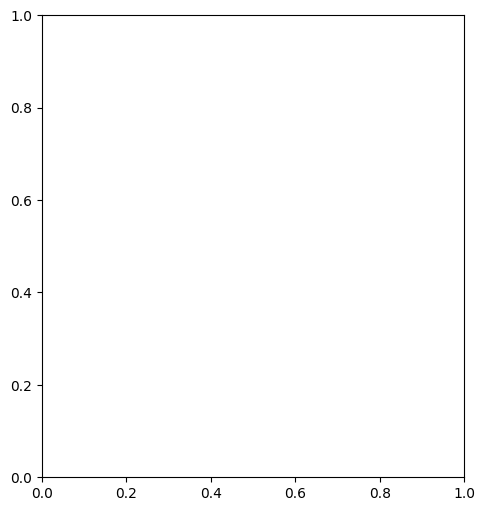

In [16]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train')
plt.plot(val_loss_history, label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Train')
plt.plot(val_accuracy_history, label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# Save the entire model to an HDF5 file
model.save('final_rnn_model.h5')

In [18]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import History

# Assuming you have a 'history' object from model training
# If not, create a History callback during model training: history = model.fit(..., callbacks=[History()])

# Save the model
model.save('final_rnn_model.h5')

# Load the model
loaded_model = load_model('final_rnn_model.h5')

# Retrieve the training and validation loss values
training_loss = loaded_model.history.history['loss']
validation_loss = loaded_model.history.history['val_loss']

# Plot the training and validation loss values
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


AttributeError: 'NoneType' object has no attribute 'history'